<a href="https://colab.research.google.com/github/Ksenya-Tuboltseva/Python_analysis/blob/main/World_Marathons_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ результатов марафонского бега из категории забегов Majors

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/world_marathon_majors.csv', encoding='ISO-8859–1')
df.head()

,year,winner,gender,country,time,marathon
0,2018,Dickson Chumba,Male,Kenya,02:05:30,Tokyo
1,2018,Birhane Dibaba,Female,Ethiopia,02:19:51,Tokyo
2,2017,Wilson Kipsang,Male,Kenya,02:03:58,Tokyo
3,2017,Sarah Chepchirchir,Female,Kenya,02:19:47,Tokyo
4,2016,Feyisa Lilesa,Male,Ethiopia,02:06:56,Tokyo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      536 non-null    int64 
 1   winner    536 non-null    object
 2   gender    536 non-null    object
 3   country   536 non-null    object
 4   time      536 non-null    object
 5   marathon  536 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.2+ KB


In [ ]:
df["marathon"].unique()

array(['Tokyo', 'Berlin', 'Boston', 'NYC', 'London', 'Chicago'],
      dtype=object)

###Всего к забегам majors относится 5 марафонов в городах: Токио, Берлин, Бостон, Нью-Йорк, Лондон и Чикаго.

In [ ]:
df.sort_values("time")

,year,winner,gender,country,time,marathon
30,2014,Dennis Kimetto,Male,Kenya,02:02:57,Berlin
127,2011,Geoffrey Mutai,Male,Kenya,02:03:02,Boston
26,2016,Kenenisa Bekele,Male,Ethiopia,02:03:03,Berlin
382,2016,Eliud Kipchoge,Male,Kenya,02:03:05,London
32,2013,Wilson Kipsang,Male,Kenya,02:03:23,Berlin
...,...,...,...,...,...,...
218,1966,Bobbi Gibb,Female,United States,03:21:40,Boston
111,1974,Jutta von Haase,Female,Germany,03:22:01,Berlin
212,1969,Sara Mae Berman,Female,United States,03:22:46,Boston
216,1967,Bobbi Gibb,Female,United States,03:27:17,Boston


In [ ]:
df["winner"].nunique()

315

###Всего в марафонах побеждали 315 человек на 536 проведенных забегах

In [ ]:
df["country"].value_counts()

,count
country,
Kenya,136
United States,104
Ethiopia,51
Germany,36
United Kingdom,35
Japan,22
Norway,20
Canada,17
Portugal,11


###Наибольшее количество победителей забегов наблюдается из Кении, как из страны с наиболее сильными результатами в длинном беге, на втором месте - Соединенные Штаты Америки. Реже всего выигрывали представители таких стран как: Китай, Венгрия, Эритрея, Гватемала, Югославия, Советский Союз.

In [ ]:
df[df["country"]=="Soviet Union"]

,year,winner,gender,country,time,marathon
432,1991,Yakov Tolstikov,Male,Soviet Union,02:09:17,London


Одна победа в major Принадлежит представителю Советского Союза, Якову Толстикову, в 1991 году в Лондоне со временем 2:09:17

In [ ]:
df["winner"][(df["time"] == df["time"].min()) & (df["gender"] == "Male")]

,winner
30,Dennis Kimetto


In [ ]:
df[df["winner"]=="Dennis Kimetto"]

,year,winner,gender,country,time,marathon
10,2013,Dennis Kimetto,Male,Kenya,02:06:50,Tokyo
30,2014,Dennis Kimetto,Male,Kenya,02:02:57,Berlin
463,2013,Dennis Kimetto,Male,Kenya,02:03:45,Chicago


###Лучший результат за все время проведения соревнований среди мужчин показал кениец Dennis Kimetto - 02:02:57

In [ ]:
female = df[df["gender"] == "Female"]
female['winner'][female["time"] == female["time"].min()]

,winner
409,Paula Radcliffe


In [ ]:
df[df["winner"]=="Paula Radcliffe"]

,year,winner,gender,country,time,marathon
304,2008,Paula Radcliffe,Female,United Kingdom,02:23:56,NYC
306,2007,Paula Radcliffe,Female,United Kingdom,02:23:09,NYC
312,2004,Paula Radcliffe,Female,United Kingdom,02:23:10,NYC
405,2005,Paula Radcliffe,Female,United Kingdom,02:17:42,London
409,2003,Paula Radcliffe,Female,United Kingdom,02:15:25,London
411,2002,Paula Radcliffe,Female,United Kingdom,02:18:56,London
486,2002,Paula Radcliffe,Female,United Kingdom,02:17:18,Chicago


###Лучший результат за все время проведения соревнований среди женщин показала представительница Объединенного Королевства Paula Radcliffe - 02:15:25

In [ ]:
df["winner"].value_counts()

Grete Waitz           11
Bill Rodgers           8
Ingrid Kristiansen     8
Clarence DeMar         7
Paula Radcliffe        7
                      ..
Paavo Kotila           1
Franjo Mihalic         1
John J. Kelley         1
Antti Viskari          1
Vivian Cheruiyot       1
Name: winner, Length: 315, dtype: int64

In [ ]:
df["country"][df['winner']=="Grete Waitz"].unique()

array(['Norway'], dtype=object)

###Наибольшее количество побед принадлежит Grete Waitz, представительнице Норвегии.

In [ ]:
man_olympic = "02:08:10"
woman_olympic = "02:26:50"

In [ ]:
df["winner"][(df['gender'] == "Male") & (df["time"] < man_olympic)].count()

83

In [ ]:
df["winner"][(df['gender'] == "Female") & (df["time"] < woman_olympic)].count()

134

###При сравнении с Олимпийским нормативом на 2023 год мужчины выполнили норматив 83 раза, а женщины - 134

Text(0.5, 1.0, 'Распределение по полу')

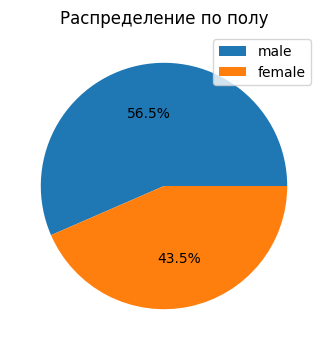

In [ ]:
data = df["gender"].value_counts()
data.index = ["male", "female"]

plt.figure(figsize=(6,4))
plt.pie(data, autopct="%1.1f%%")
plt.legend(data.index)
plt.title("Распределение по полу")

Text(0.5, 1.0, 'Количество победителей из разных стран')

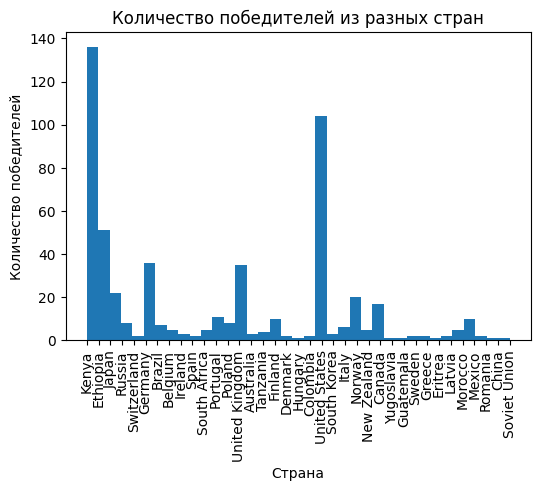

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["country"], bins=37)
plt.xlabel("Страна")
plt.xticks(rotation = 90)
plt.ylabel("Количество победителей")
plt.title("Количество победителей из разных стран")

###Наибольшее количество победителей являются представителями Кении и Объединенного Королевства.

Text(0.5, 1.0, 'Популярность марафонов')

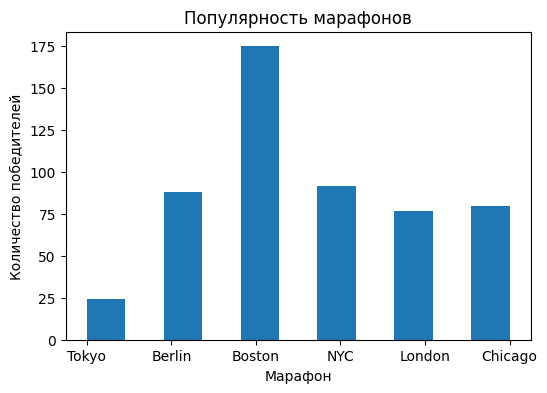

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["marathon"], bins=11)
plt.xlabel("Марафон")
plt.ylabel("Количество победителей")
plt.title("Популярность марафонов")

###По тому, что наибольшее количество победителей приходится на марафон в Бостоне, делаем вывод, что в этом городе наиболее часто проводится забег.

Text(0.5, 1.0, 'Зависимость финишного времени от года проведения соревнований')

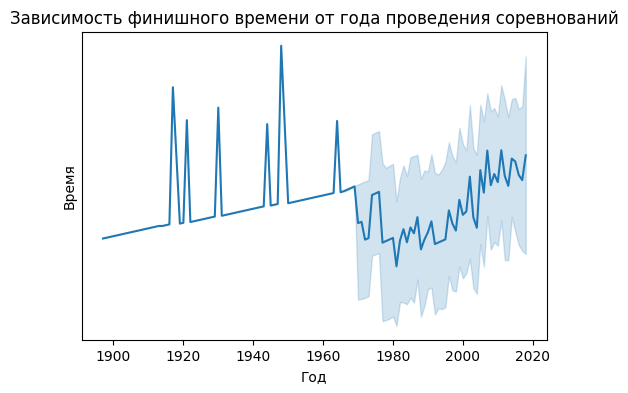

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x = "year", y = "time")
plt.xlabel("Год")
plt.ylabel("Время")
plt.yticks([])
plt.title("Зависимость финишного времени от года проведения соревнований")